In [1]:
%matplotlib inline
import numpy as np
from numpy import max, abs, dot, array
import pandas as pd
import matplotlib.pyplot as plt


### Multiplying by complex numbers is a rotation
This is a minor re-wording of the bread-and-butter knowledge in signal processing that (using $i=e^{j \frac {\pi} 2}$) multiplication of a signal with a complex exponential results in shifting the phase of the signal. If we view the signal as a vector in polar form in the complex plane, the multiplication by a complex exponential is equivalent to applying a rotation matrix constructed by the desired angle of the phase shift.

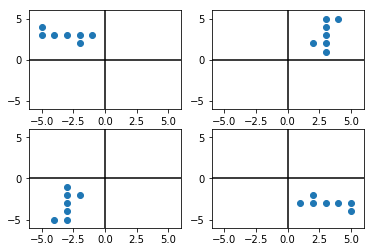

In [4]:
complex_nums = array([
    -5+4j,
    -5+3j, -4+3j, -3+3j, -2+3j, -1+3j,
                         -2+2j,
])

def plot_axes(length):
    plt.plot([0, 0], [-length, length], color='k')
    plt.plot([-length, length], [0, 0], color='k')
    
def plot_complex(nums):
    plt.scatter(nums.real, nums.imag)
    lim = 1 + max([max(abs(nums.real)), max(abs(nums.imag))])
    plot_axes(lim)
    plt.axis([-lim, lim, -lim, lim])
    
# multiplying by i is a rotation counter-clockwise by 45 degrees
plt.figure()
inds = [1, 3, 4, 2]
for i in range(1, 5):
    plt.subplot(2, 2, inds[i-1])
    plot_complex(complex_nums)
    complex_nums *= 1j

### Complex Exponentials and Rotation Matrices
Let's bridge the gap that many face when asking signal processing folks and graphics folks about rotations. We can do this by showing how to rotate a vector $\begin{bmatrix} 1 \\ 0 \end{bmatrix}$ in $\mathbb{C}$ by 45$^{\circ}$ by 1) multiplication by a complex exponential and 2) multiplication by a rotation matrix.

#### Complex Exponential (Signal Processing)
By Euler's method, we know that $i=e^{j \frac {\pi} 2}$. Let's also represent our vector $\begin{bmatrix} 1 \\ 0 \end{bmatrix}$ in it's rectangular form as $1 + 0j$, and then convert it to its polar form as $e^{j0}$. Multiplying these two, we get

$$
\begin{align}
    e^{j \frac \pi 2}e^{j0} = e^{j \frac \pi 2 + 0}
            &= e^{j \frac \pi 2} \\
            &= 0 + 1j \\
            &= \begin{bmatrix}0 \\ 1 \end{bmatrix}
\end{align}
$$

#### Rotation Matrix
The canonical rotation matrix for a desired angle $\theta$ for a two-dimensional space is
$$
\begin{bmatrix}
cos \theta  & -sin \theta \\
sin \theta  & cos \theta
\end{bmatrix}
$$

So let's take $\mathbb{C}$ for our space. Since the current rotation is $\theta = 45^{\circ}$, the corresponding rotation matrix is
$$
\begin{bmatrix}
0  & -1 \\
1  & 0
\end{bmatrix}
$$

Applying the rotation matrix to the original vector, we have
$$
\begin{bmatrix}
0  & -1 \\
1  & 0
\end{bmatrix}
\begin{bmatrix}
1 \\
0
\end{bmatrix}
=
\begin{bmatrix}
0 \\
1
\end{bmatrix}
$$

#### The Bridge
We can start with the rotation matrix representation and bridge over to the phasor (complex exponential) representation. The rotation of angle $\theta$ on an arbitrary vector $c \in \mathbb{C}, c = c_r + j c_i$ is
$$
\begin{bmatrix}
cos \theta  & -sin \theta \\
sin \theta  & cos \theta
\end{bmatrix}
\begin{bmatrix}
c_r \\
c_i
\end{bmatrix}
=
\begin{bmatrix}
c_r cos \theta - c_i sin \theta \\
c_r sin \theta + c_i cos \theta
\end{bmatrix}
$$

Remember that this is a representation of a vector in $\mathbb{C}$, so $\begin{bmatrix}x \\ y \end{bmatrix} = x + j y$. Therefore,
$$
\begin{align}
    \begin{bmatrix}
    c_r cos \theta - c_i sin \theta \\
    c_r sin \theta + c_i cos \theta
    \end{bmatrix}
    &= c_r cos \theta - c_i sin \theta + j(c_r sin \theta + c_i cos \theta) \\
    &= c_r cos \theta + j^2 c_i sin \theta + j c_r sin \theta + j c_i cos \theta \\
    &= (c_r + j c_i)(cos \theta + j sin \theta) \\
    &= c e^{j\theta}
\end{align}
$$

So the real bridge here was that rotation via the complex exponential was accomplished using polar coordinates, while using the rotation matrix worked in rectangular coordinates. By converting the coordinate system of one, you arrive at the other.